In [51]:
import pypsa as psa
import networkx as nx
import numpy as np
import pandas as pd

(<matplotlib.collections.PatchCollection at 0x20d582c7790>,
 <matplotlib.collections.LineCollection at 0x20d583535e0>)

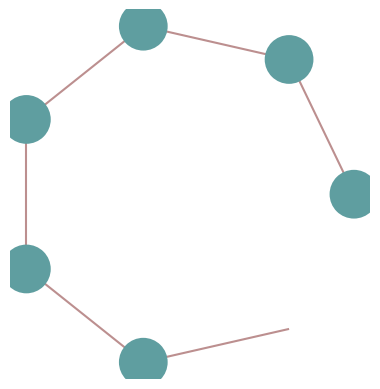

In [52]:
net = psa.Network()

for i in range(5):
    net.add("Bus", "My bus {}".format(i), x=0, y=i)

bus_count = len(net.buses.index.to_list())
net.add("Bus", "My bus {}".format(bus_count), x=1, y=2)

for i in range(len(net.buses.index.to_list())):
    line_count = len(net.lines.index.to_list())
    net.add("Line", "My line {}".format(line_count),
            bus0="My bus {}".format(i),
            bus1="My bus {}".format(i+1),
            x=0, r=0,
            length=0.001)

net.plot(layouter=nx.circular_layout)


In [53]:
buses = range(10)
snapshots = range(7)
n = psa.Network()
n.set_snapshots(snapshots)
n.madd("Bus", buses)

# add load as numpy array
n.madd("Load",
       n.buses.index[:5] + " load",
       bus=buses[:5],
       p_set=np.random.rand(len(snapshots), len(buses)-5))

#use a suffix to avoid boilerplate to rename everything
gen = [7, 8]
for i in gen:
    n.add("Generator",
           name='my gen {}'.format(i),
           bus=i,
           p_nom_extendable=True,
           capital_cost=1e5,
           marginal_cost=i)

n.madd("Line", n.buses.index + ' lines',
       bus0=buses,
       bus1=np.roll(buses,1),
       r=0.01, x=0.01)

Index(['0 lines', '1 lines', '2 lines', '3 lines', '4 lines', '5 lines',
       '6 lines', '7 lines', '8 lines', '9 lines'],
      dtype='object', name='Bus')

In [54]:
n.pf()
n.iplot()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots RangeIndex(start=0, stop=7, step=1, name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.022238 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.023272 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.024377 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.024944 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.023321 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.026489 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.023317 seconds


{'data': [{'x': 0   -1.000000
   1   -0.259259
   2   -0.166667
   3   -0.074074
   4    0.018519
   5    0.111111
   6    0.203704
   7    0.296296
   8    0.388889
   9    0.481481
   Name: x, dtype: float64,
   'y': 0   -0.333333
   1    0.407407
   2    0.314815
   3    0.222222
   4    0.129630
   5    0.037037
   6   -0.055556
   7   -0.148148
   8   -0.240741
   9   -0.333333
   Name: y, dtype: float64,
   'text': Index(['Bus 0', 'Bus 1', 'Bus 2', 'Bus 3', 'Bus 4', 'Bus 5', 'Bus 6', 'Bus 7',
          'Bus 8', 'Bus 9'],
         dtype='object', name='Bus'),
   'type': 'scatter',
   'mode': 'markers',
   'hoverinfo': 'text',
   'opacity': 1,
   'marker': {'color': 'cadetblue', 'size': 10}},
  {'x': Line
   0 lines   -0.259259
   1 lines   -0.629630
   2 lines   -0.212963
   3 lines   -0.120370
   4 lines   -0.027778
   5 lines    0.064815
   6 lines    0.157407
   7 lines    0.250000
   8 lines    0.342593
   9 lines    0.435185
   dtype: float64,
   'y': Line
   0 lines   -0.333

In [83]:
# import cvxpy
import highspy
# n.model
n.optimize.create_model()
n.optimize.solve_model(solver_name='HiGHS')

INFO:linopy.model: Solve linear problem using Highs solver


AssertionError: Solver HiGHS not installed

In [77]:
m = n.optimize.create_model()
gen_p = m.variables["my gen 7"]

n.optimize.solve_model()

KeyError: 'my gen 7'

In [78]:
print(n.buses.generator)

Bus
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7    my gen 7
8         NaN
9         NaN
Name: generator, dtype: object


In [75]:
import numpy as np
x = np.roll([1,2,3], 2)

In [76]:
np.version.version

'1.23.1'